# PyTorch workflow

Let's explore aa an example PyTorch end-toend workflow

In [1]:
what_were_covering = {1: 'data (prepare and load)',
                      2: 'build model',
                      3: 'fitting the model to data',
                      4: 'making predictions and evaluating a model (inference)',
                      5: 'saving and loading a model', 
                      6: 'putting it all together'}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn # nn contains all of PyTorch's building block ofr neural networks.
import matplotlib.pyplot as plt

# Check Pytorch version
torch.__version__

'2.3.1+cu118'

## 1. Data (preparing and loading)

Data and be almost anything... in machine learning

* Excel spreadsheet
* Images of any kind
* Videos (YouTube has lots of data...)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a gane of tow parts:
1. Gets data into a numerical representaion
2. Build a model to learn patterns in that numerical representaion.

To showcase this, let's create some *known* data using the linear regression formula.   
We'll use a linear regression formula to make a straight line with known **parameters**.

In [3]:
# Create * known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

### Splitting data into training and test data (one of the most important concept in machine learning in general)
Let's create a training and test set with our data.

In [5]:
# create a train/test split 
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [6]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

How might we better visualize our data?   
This is where tihe data explorer's motto comes in!   
"Visualize, visualize, visualize!"

In [7]:
def plot_predictions(train_data=X_train,
                     train_label=y_train,
                     test_data=X_test,
                     test_label=y_test,
                     predictions=None):
    
    """
    Plots training data, test data and compare predictions.
    """

    plt.figure(figsize=(10, 7))

    # Plto training data in blue
    plt.scatter(train_data, train_label, c='b', s=4, label='Training data')
    
    # Plto test data in blue
    plt.scatter(test_data, test_label, c='g', s=4, label='Testing data')

    # Are therepredictions?
    if predictions is not None:
        # Plot the predictions if they exist
        plt.scatter(test_data, predictions, c='r', s=4, label='Predicitions')

    # Show the legend
    plt.legend(prop={'size': 14})
    

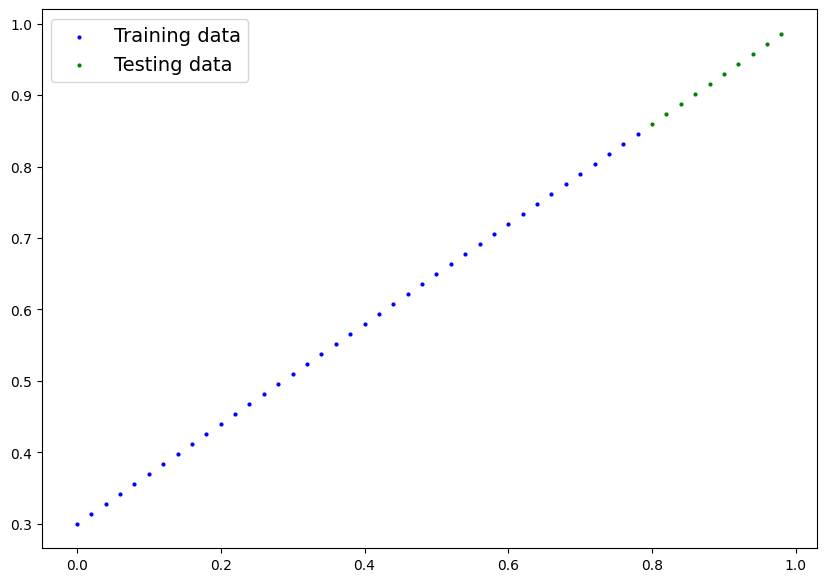

In [8]:
plot_predictions()

## 2. Build model

Our first PyTorch model   
This is very exciting... let's do it!   
   
Because we're going to be building classes throughout the course, I'd recommend getting familiar with OOP in Python, to do so you can use the following resource from Real Python   

What our model does:
* Start with randoim values (weight & bias)
* Look at training data and adjust the random value to better represent (or get closer to) the ideal values (the weight & bias values we uesd to create the data)

How does it do so?   
   
Through tow main algorithms:
1. Gradient descent
2. Backpropagation

In [9]:
from torch import nn
# Create linear regression model class
class linearRegrssionModel(nn.Module): # <- almost everything in PyTorch inherhits from nn.module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(
            1, 
            requires_grad=True, 
            dtype=torch.float
        ))
        self.bias = nn.Parameter(torch.randn(
            1, 
            requires_grad=True, 
            dtype=torch.float
        ))

    # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # 'x' is the input data
        return self.weights * x + self.bias # this is the linear regression formular

### PyTorch model building essentials
* torch.nn = contains all of the buildings ofr computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - The bass class ofr all neural network modules, if you shoud overwrite forward()
* torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - all nn.Module subclass require you to overwrite forawrd(), this method defines what happens in the forward computation

### Checking hte contents of our PyTorch model

Now we've created a model, let's see what's inside   
So we can check out model parameters or what's inside our model using `.parameters()`.

In [10]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model(this is a subclass of nn.Modeule)
model = linearRegrssionModel()

# Check put the parameters
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
# List name parameters
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [12]:
weight, bias

(0.7, 0.3)

### Making prediction using `torch.inference_mode()`
To chech our model's predictive power, let's see how well it predicts `y_test` based on `X_test`
    
When we pass data through out model, it's going to run it through the `forward()` method

In [13]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [14]:
# Make presions with model
with torch.inference_mode():
    y_pred = model(X_test)

# You can also do somthing similar with torch.no_grad(), however, torch.inference_mode() is preffered
# with torch.inference_mode():
#     y_pred = model(X_test)
y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [15]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

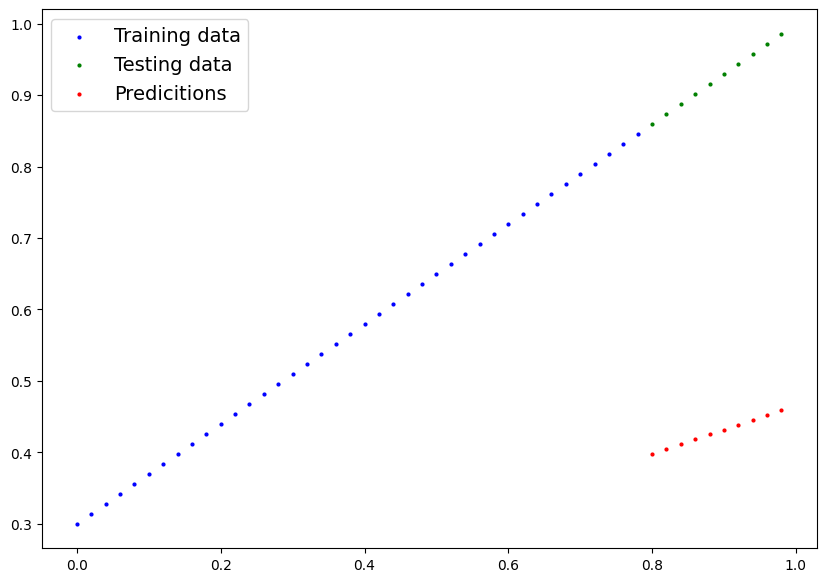

In [16]:
plot_predictions(predictions=y_pred)

## 3. Train model
The whole idea of training is for a model to move from some *known* parameters (these amy be random) to some known parameters.

Or in ither words from a poor representation of the data to a better representation of the data

one way to mesure how poor or how wrong your models prdictions are is to use a loss function.

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss
* **Loss Function**: A function to measure how wrong your model's prdictions are to ideal outputs, lower is better
* **Optimizer**: Takes into account the loss of a model and adjust the model's parameters (e.g. weight & bias in our case) tp improve the loss function.

And specifically ofr PyTorch, we need:
* A training loop
* A testing loop

In [17]:
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [18]:
# Check out our model's parameters (a parameter is a value that model sets itself)
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [19]:
# Setip a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.0001) # lr = learning rate = possibly the most important hyperparameter you can set

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called forwwrd propagation
2. Calculate the loss (compare forward pass predictions to ground throuth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of esch of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimize step - use the optimizer to adjust our model's parameters to try and improve the loss (**Gradient descent**)

In [20]:
with torch.inference_mode():
    list(model.parameters())

In [21]:
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [22]:
torch.manual_seed(42)

# An epoch is one loop through the data... (this is a hyperparameter because we've set it ourselves)
epochs = 20000

# Track diffrent value
epoch_count = []
loss_value = []
test_loss_value = []

## Training
# 0. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model.train() # train mode in PyTorch sets all parameters that require gradients to require gradients
    
    # 1. Forward pass
    y_pred = model(X_train)

    # 2. Calculate the loss 
    loss = loss_fn(y_pred, y_train)
    # print(f'Loss: {loss}')

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perfom backproragation on the loss with respect to the parameters if the model
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)
    # by default how the optimizer shanges will acculumate through the loop so... we have to zero them above in step 3 for the next iteration of the loop
    optimizer.step() 

    ## Testing
    model.eval() # turns off diffrent setttings in the model mot need ofr evaluation/testing

    with torch.inference_mode(): # turns off gradient tracking & a cuple more things behind the scenes
    # with torch.no_grad(): # you may also see torch.no_grad() in order PyTorch code
        # 1. Do the forward pass
        test_pred = model(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    #Print out what's happenin
    if epoch % 1000 == 0:
        epoch_count.append(epoch)
        loss_value.append(loss)
        test_loss_value.append(test_loss)
        print(f'Epoch: {epoch} | Loss: {loss} | Test Loss {test_loss}')

        # Print out model state_dict()
        print(model.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test Loss 0.4944015145301819
OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1289]))])
Epoch: 1000 | Loss: 0.1976652592420578 | Test Loss 0.3596797585487366
OrderedDict([('weights', tensor([0.3757])), ('bias', tensor([0.2289]))])
Epoch: 2000 | Loss: 0.08982332795858383 | Test Loss 0.22905269265174866
OrderedDict([('weights', tensor([0.4147])), ('bias', tensor([0.3249]))])
Epoch: 3000 | Loss: 0.05364571884274483 | Test Loss 0.15158791840076447
OrderedDict([('weights', tensor([0.4483])), ('bias', tensor([0.3725]))])
Epoch: 4000 | Loss: 0.045492880046367645 | Test Loss 0.11691746860742569
OrderedDict([('weights', tensor([0.4728])), ('bias', tensor([0.3853]))])
Epoch: 5000 | Loss: 0.04159027710556984 | Test Loss 0.10100533813238144
OrderedDict([('weights', tensor([0.4923])), ('bias', tensor([0.3839]))])
Epoch: 6000 | Loss: 0.03809983655810356 | Test Loss 0.08999161422252655
OrderedDict([('weights', tensor([0.5103])), ('bias', tensor([0.

In [23]:
loss_value = torch.tensor(loss_value).numpy()
test_loss_value = torch.tensor(test_loss_value).numpy()

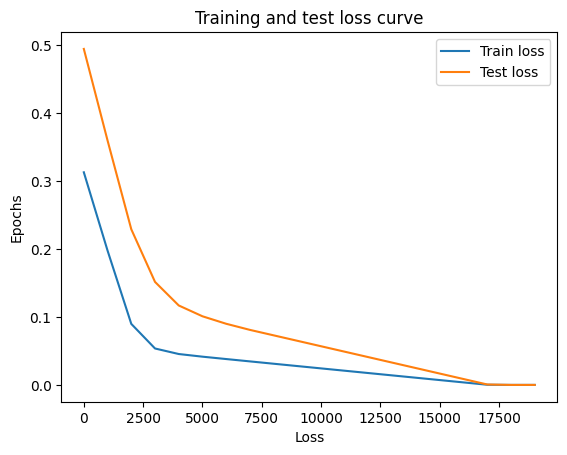

In [24]:
# Plot the loss curves
plt.plot(epoch_count, loss_value, label='Train loss')
plt.plot(epoch_count, test_loss_value, label='Test loss')
plt.title('Training and test loss curve')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.legend()

In [25]:
model.state_dict()

OrderedDict([('weights', tensor([0.6999])), ('bias', tensor([0.3000]))])

In [26]:
with torch.inference_mode():
    y_pred = model(X_test)

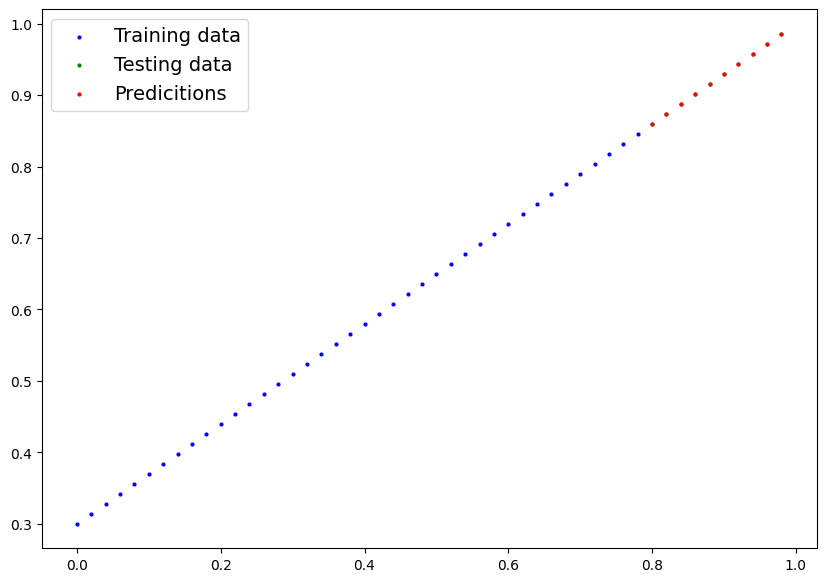

In [27]:
plot_predictions(predictions=y_pred)

### Saving a model in PyTorch

There are three main method you should about for saving and loading models in PyTorch.
1. `torch.save` - allows you save a PyTorch object in Python pickle format
2. `torch.load` - allows you load a PyTorch object
3. `torch.nn.Mpdule.load_state_dict()` - this allow to load a model's saved state dictionary

In [28]:
# Svaing oout PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = '01_pytorch_workflow_model.pt'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Svae model state_dict
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model.state_dict(), 
           f=MODEL_SAVE_PATH)

Saving model to: models\01_pytorch_workflow_model.pt


### Loading a PyTorch model

Since we saved our model's `state_dict()` rather the entire model, we'll create m new instance of our model class and load saved `state_dict()` into that.

In [29]:
model.state_dict()

OrderedDict([('weights', tensor([0.6999])), ('bias', tensor([0.3000]))])

In [30]:
# To load in a saced state_dict we have to instance a new instance of our model class
load_model = linearRegrssionModel()

# Load the saved state_dict of model (this will ipdate the new instance with updated parameters)
load_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [31]:
load_model.state_dict()

OrderedDict([('weights', tensor([0.6999])), ('bias', tensor([0.3000]))])

In [32]:
# make some predictions with our loaded model
load_model.eval()
with torch.inference_mode():
    loaded_model_pred = load_model(X_test)

loaded_model_pred

tensor([[0.8599],
        [0.8739],
        [0.8879],
        [0.9019],
        [0.9159],
        [0.9299],
        [0.9439],
        [0.9579],
        [0.9719],
        [0.9859]])

In [33]:
y_pred == loaded_model_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 4. Putting it all together

Let's go back through the steps above and see it all in one place

In [34]:
# Importing PyTorch and Matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.3.1+cu118'

Create device-agnostic code.

This means if we'e got access to a GPU, our code will use it (For potentially faster computing).

If no GPU is available, the code will default to using CPU

In [35]:
# Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')

Using device: cuda


### 1. Data

In [36]:
# Create some data using the linear regresion dormula of y = weigth * X + bias
weight = 0.7
bias = 0.3

# Create reange values
start = 0
ane = 1
step = 0.02

# Create X and y (feature and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, error will pop up
y = weight * X + bias

In [37]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

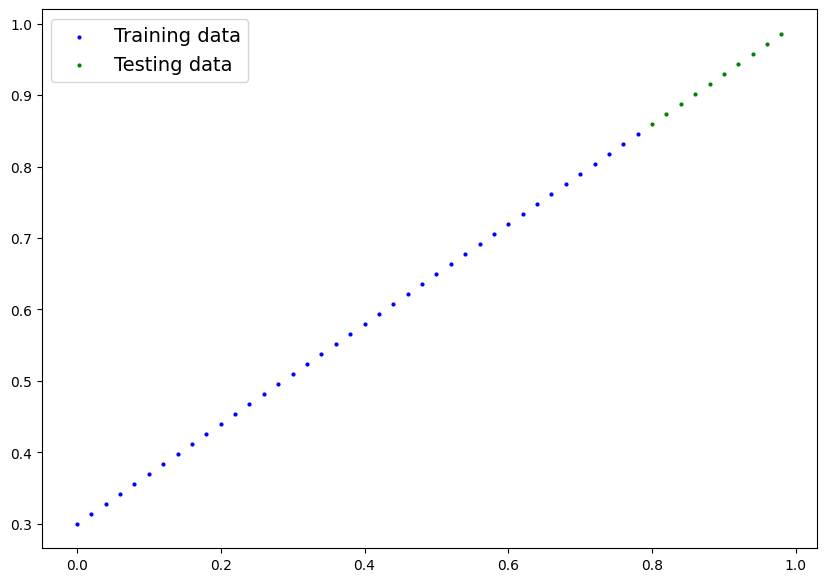

In [38]:
# Plot the data
# Note: if you don't have the plot_prdictions() function loaded, this will error
plot_predictions(X_train, y_train, X_test, y_test)

### 2. Building a PyTorch Linear model

In [39]:
# Create a linear model ny subclassing nn.Module
class linearRegrssionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameter / also called: linear transform, probing layer, fully connected layer, dense layer
        self.linear_layer = nn.Linear(in_features=1, out_features=1)


    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

In [40]:
# Set the model seed
torch.manual_seed(42)
model_v2 = linearRegrssionModelV2()
model_v2, model_v2.state_dict()

(linearRegrssionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [41]:
next(model_v2.parameters()).device

device(type='cpu')

In [42]:
# Set the model to use the target device
model_v2.to(device)
next(model_v2.parameters()).device

device(type='cuda', index=0)

In [43]:
model_v2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8300], device='cuda:0'))])

### 3. Training

For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [44]:
# Setup loss function
loss_fn = nn.L1Loss() # same a MAE

# Setup optimizer
optimizer = torch.optim.SGD(params=model_v2.parameters(),
                            lr = 0.001) # 

In [45]:
# Training loop
torch.manual_seed(42)

epochs = 20000

# put data on target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_v2.train()

    # 1. Forward pass
    y_pred = model_v2(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Preform backpropagation
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Testimg
    model_v2.eval()

    with torch.inference_mode():
        test_pred = model_v2(X_test)
        test_loss = loss_fn(test_pred, y_test)

    # Print out what's happenin
    if epoch % 1000 == 0:
        print(f'Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}')

Epoch: 0 | Train loss: 0.5551779866218567 | Test loss: 0.5861001014709473
Epoch: 1000 | Train loss: 0.006145037245005369 | Test loss: 0.01429052371531725
Epoch: 2000 | Train loss: 0.0007765308255329728 | Test loss: 0.000619995582383126
Epoch: 3000 | Train loss: 0.0007765308255329728 | Test loss: 0.000619995582383126
Epoch: 4000 | Train loss: 0.0007765308255329728 | Test loss: 0.000619995582383126
Epoch: 5000 | Train loss: 0.0007765308255329728 | Test loss: 0.000619995582383126
Epoch: 6000 | Train loss: 0.0007765308255329728 | Test loss: 0.000619995582383126
Epoch: 7000 | Train loss: 0.0007765308255329728 | Test loss: 0.000619995582383126
Epoch: 8000 | Train loss: 0.0007765308255329728 | Test loss: 0.000619995582383126
Epoch: 9000 | Train loss: 0.0007765308255329728 | Test loss: 0.000619995582383126
Epoch: 10000 | Train loss: 0.0007765308255329728 | Test loss: 0.000619995582383126
Epoch: 11000 | Train loss: 0.0007765308255329728 | Test loss: 0.000619995582383126
Epoch: 12000 | Train los

In [46]:
model_v2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6999]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3008], device='cuda:0'))])

In [47]:
weight, bias

(0.7, 0.3)

### 4. Making and evaluating predictions

In [48]:
# Turn model into evaluation mode
model_v2.eval()

# Making preictions on the test data
with torch.inference_mode():
    y_pred = model_v2(X_test)
y_pred

tensor([[0.8607],
        [0.8747],
        [0.8887],
        [0.9027],
        [0.9167],
        [0.9307],
        [0.9447],
        [0.9587],
        [0.9727],
        [0.9867]], device='cuda:0')

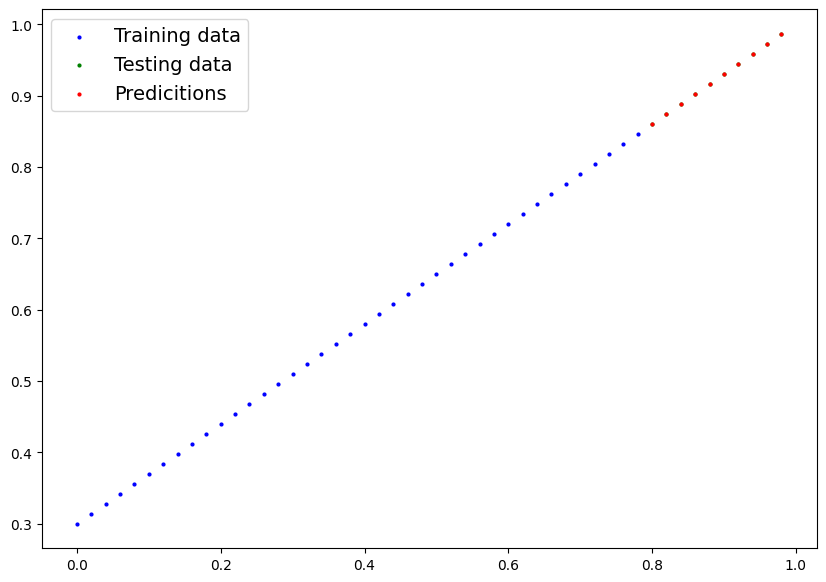

In [49]:
# Check out our model predictions visually
plot_predictions(predictions=y_pred.cpu())

### 5. Saving & loading trained model

In [50]:
# Saaving out PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = '01_pytorch_workflow_model_v2.pt'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_v2.state_dict(), 
           f=MODEL_SAVE_PATH)

Saving model to: models\01_pytorch_workflow_model_v2.pt


In [51]:
# Load a PyTorch

# Create a new instance of linear regression model v2
load_model_v2 = linearRegrssionModelV2()

# Load the saved model_v2 state_dict
load_model_v2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Put the loaded model to device
load_model_v2.to(device)

linearRegrssionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [52]:
next(load_model_v2.parameters()).device

device(type='cuda', index=0)

In [53]:
load_model_v2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6999]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3008], device='cuda:0'))])

In [54]:
# Evaluate the loaded model
load_model_v2.eval()
with torch.inference_mode():
    loaded_model_v2_pred = load_model_v2(X_test)

y_pred == loaded_model_v2_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

# Exercises

All exercises have been inspired from code throughout the notebook.

There is one exercise per major section.

You should be able to complete them by referencing their specific section.

Note: For all exercises, your code should be device agnostic (meaning it could run on CPU or GPU if it's available).
    
1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
    * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total.
    * Split the data into 80% training, 20% testing.
    * Plot the training and testing data so it becomes visual.
2. Build a PyTorch model by subclassing `nn.Module`.
    * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for` weights` and one for `bias`.
    * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1.
    * Once you've constructed the model, make an instance of it and check its `state_dict()`.
    * Note: If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.
3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively.
    * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
    * Write a training loop to perform the appropriate training steps for 300 epochs.
    * The training loop should test the model on the test dataset every 20 epochs.
4. Make predictions with the trained model on the test data.
    * Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).
5. Save your trained model's `state_dict()` to file.
    * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
    * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.
    * Resource: See the [**exercises notebooks templates**](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/exercises) and [**solutions**](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) on the course GitHub.

# Extra-curriculum
* Listen to [**The Unofficial PyTorch Optimization Loop Song**](https://youtu.be/Nutpusq_AFw) (to help remember the steps in a PyTorch training/testing loop).
* Read [**What is torch.nn, really?**](https://pytorch.org/tutorials/beginner/nn_tutorial.html) by Jeremy Howard for a deeper understanding of how one of the most important modules in PyTorch works.
* Spend 10-minutes scrolling through and checking out the [**PyTorch documentation cheatsheet**](https://pytorch.org/tutorials/beginner/ptcheat.html) for all of the different PyTorch modules you might come across.
* Spend 10-minutes reading the [**loading and saving documentation on the PyTorch website**](https://pytorch.org/tutorials/beginner/saving_loading_models.html) to become more familiar with the different saving and loading options in PyTorch.
* Spend 1-2 hours read/watching the following for an overview of the internals of gradient descent and backpropagation, the two main algorithms that have been working in the background to help our model learn.
* [**Wikipedia page for gradient descent**](https://en.wikipedia.org/wiki/Gradient_descent)
* [**Gradient Descent Algorithm — a deep dive**](https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21) by Robert Kwiatkowski
* [**Gradient descent, how neural networks learn video**](https://youtu.be/IHZwWFHWa-w) by 3Blue1Brown
* [**What is backpropagation really doing?**](https://youtu.be/Ilg3gGewQ5U) video by 3Blue1Brown
* [**Backpropagation Wikipedia Page**](https://en.wikipedia.org/wiki/Backpropagation)